In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OttawaLimpio.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    2864 non-null   int64  
 1   name                                          2864 non-null   object 
 2   description                                   2864 non-null   object 
 3   neighborhood_overview                         2864 non-null   object 
 4   host_name                                     2864 non-null   object 
 5   host_location                                 2864 non-null   object 
 6   host_response_time                            2864 non-null   object 
 7   host_response_rate                            2864 non-null   object 
 8   host_acceptance_rate                          2864 non-null   object 
 9   host_is_superhost                             2864 non-null   o

In [3]:
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
name                                            0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
property_type                                   0
room_type                                       0


In [4]:
data2 = data.copy()


**INICIA TRATAMIENTO DE VALORES ATÍPICOS**

In [5]:
cuantitativas = data.select_dtypes(include=['float', 'int'])
cualitativas = data.select_dtypes(include=['object'])


In [6]:
cualitativas

,name,description,neighborhood_overview,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,first_review,last_review,instant_bookable
0,Westboro Village Executive Suite,A tastefully decorated and well equipped upper...,"Westboro Village is a century-old community, a...",Glenn,"Ottawa, Canada",within an hour,100%,94%,t,Carlingwood - McKellar Park - Laurentien View,...,Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Toaster"", ""Extra pillows and blankets"", ""Ove...",$185.00,t,24/12/2011,30/08/2024,f
1,Rural charm close to the city,Close to Strathmere and other wedding venues. ...,Most folks ask about Strathmere - we are less ...,Daniel,"Ottawa, Canada",within an hour,100%,89%,f,No location,...,Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Ceiling fan"", ""Private backyard \u2013 Not f...",$200.00,t,19/02/2013,30/08/2024,f
2,Basement Studio - Old Ottawa East,pending description,"The worlds longest skating rink, a UNESCO heri...",Ela,"Ottawa, Canada",within an hour,100%,98%,f,No location,...,Capital,Private room in home,Private room,1 private bath,"[""Toaster"", ""Long term stays allowed"", ""Extra ...",$73.00,t,29/04/2018,27/09/2022,f
3,"Private entrance apartment, 3-bdrm - up to 8 g...",GREAT for a family or a group. The apt. is low...,"Backstreet, small family oriented, peaceful, c...",William,"Ottawa, Canada",within a few hours,100%,80%,t,No location,...,Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Toaster"", ""Host greets you"", ""Free parking o...",$66.00,t,02/07/2013,11/09/2024,f
4,"Adorable 2 bdrm, Central Ottawa PD1","This an adorable property with two bedrooms, f...","This is one of the trediest, most walkable nei...",Greg And Valerie,"Ottawa, Canada",within an hour,100%,93%,f,Braemar Park - Bel Air Heights - Copeland Park,...,Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Toaster"", ""Outdoor furniture"", ""Long term st...",$91.00,t,25/10/2015,11/05/2024,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Tina's Place walk to Parliament Hill,"Enjoy this charming 1900' house to stay, it is...",pending description,Tina,"Ottawa, Canada",within an hour,100%,95%,f,Centretown,...,Somerset,Private room in bed and breakfast,Private room,1 private bath,"[""Fire extinguisher"", ""Wifi"", ""TV"", ""Kitchen"",...",$112.00,t,10,10,f
2860,Cozy Two bedrooms Condo,"Situated in the heart of West Centre Town, fea...",pending description,You Lin,No location,within an hour,100%,95%,f,Centretown West,...,Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Wifi"", ""TV"", ""Kitchen"",...",$159.00,t,10,10,f
2861,Corporate Suite - Centertown,Enjoy a stylish experience at this centrally l...,pending description,Christopher,No location,within an hour,83%,100%,f,Centretown,...,Somerset,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""TV"", ""Kitchen"", ""Air conditioning"", ...",$72.00,t,10,10,f
2862,Charming Room in Quiet Location,"Cozy, bright room in a secure, quiet building ...",pending description,Seynabou,No location,a few days or more,32%,3%,f,No location,...,Beacon Hill-Cyrville,Private room in rental unit,Private room,1 bath,"[""Wifi"", ""TV"", ""Kitchen"", ""Paid parking on pre...",$52.00,t,10,10,f


In [7]:
cuantitativas

,Unnamed: 0,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,1,1,45.39084,4,2.0,3.0,3,180,2,...,4.990000,4.970000,4.990000,4.940000,4.960000,4.900000,1,1,0,0.660000
1,1,1,1,45.16820,4,2.0,2.0,2,14,29,...,5.000000,5.000000,5.000000,4.900000,5.000000,5.000000,1,1,0,0.070000
2,2,4,5,45.40550,1,1.0,1.0,30,365,0,...,5.000000,5.000000,5.000000,5.000000,4.890000,4.780000,1,0,1,0.120000
3,3,1,8,45.26910,8,5.0,4.0,1,90,27,...,4.690000,4.780000,4.840000,4.870000,4.730000,4.630000,1,1,0,0.670000
4,4,6,8,45.40455,4,2.0,2.0,31,1125,2,...,4.780000,4.890000,4.890000,4.890000,4.890000,4.780000,6,3,3,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2859,2,2,45.41259,2,1.0,1.0,1,365,13,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,1,0,1,2.019579
2860,2860,1,1,45.39920,4,2.0,2.0,30,365,30,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,1,1,0,2.019579
2861,2861,6,8,45.41247,2,1.0,1.0,30,365,30,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,2,2,0,2.019579
2862,2862,24,42,45.44961,1,1.0,1.0,5,365,30,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,24,6,18,2.019579


**DIAGRAMA DE CAJA PARA EL DATAFRAME**

<Figure size 1500x800 with 0 Axes>

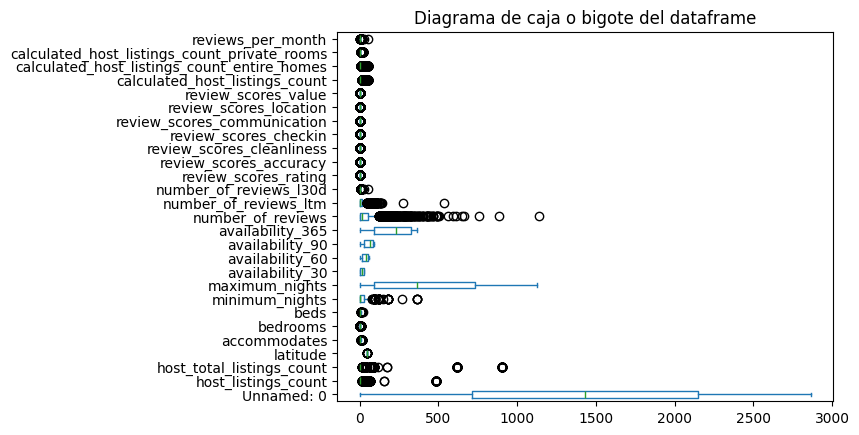

In [8]:
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote del dataframe')
plt.show()

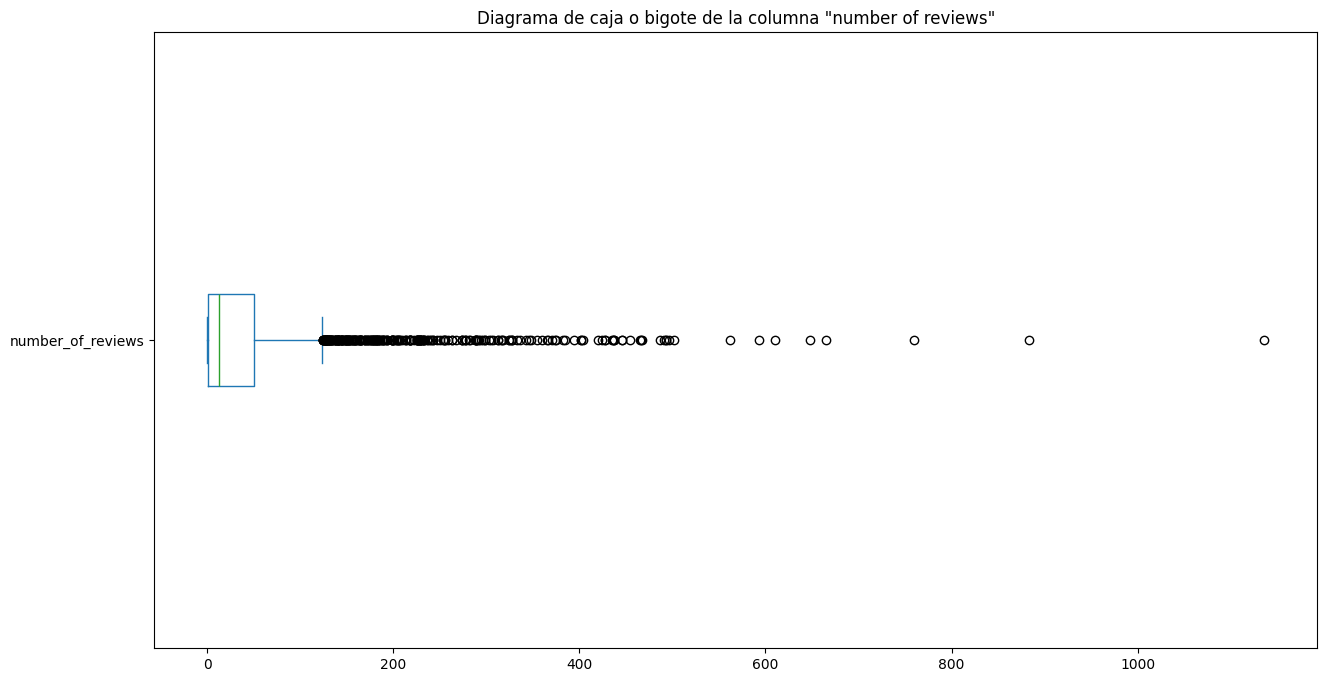

In [25]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['number_of_reviews'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de la columna "number of reviews"')
plt.show()

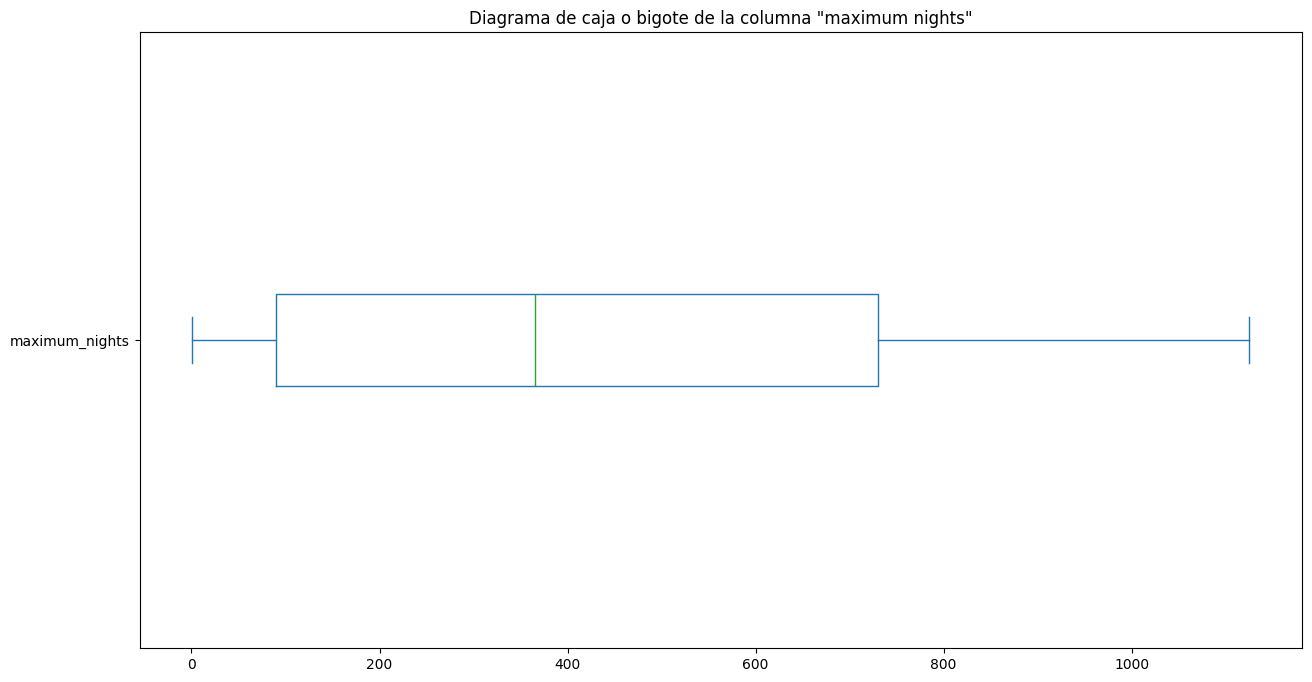

In [26]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['maximum_nights'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de la columna "maximum nights"')
plt.show()

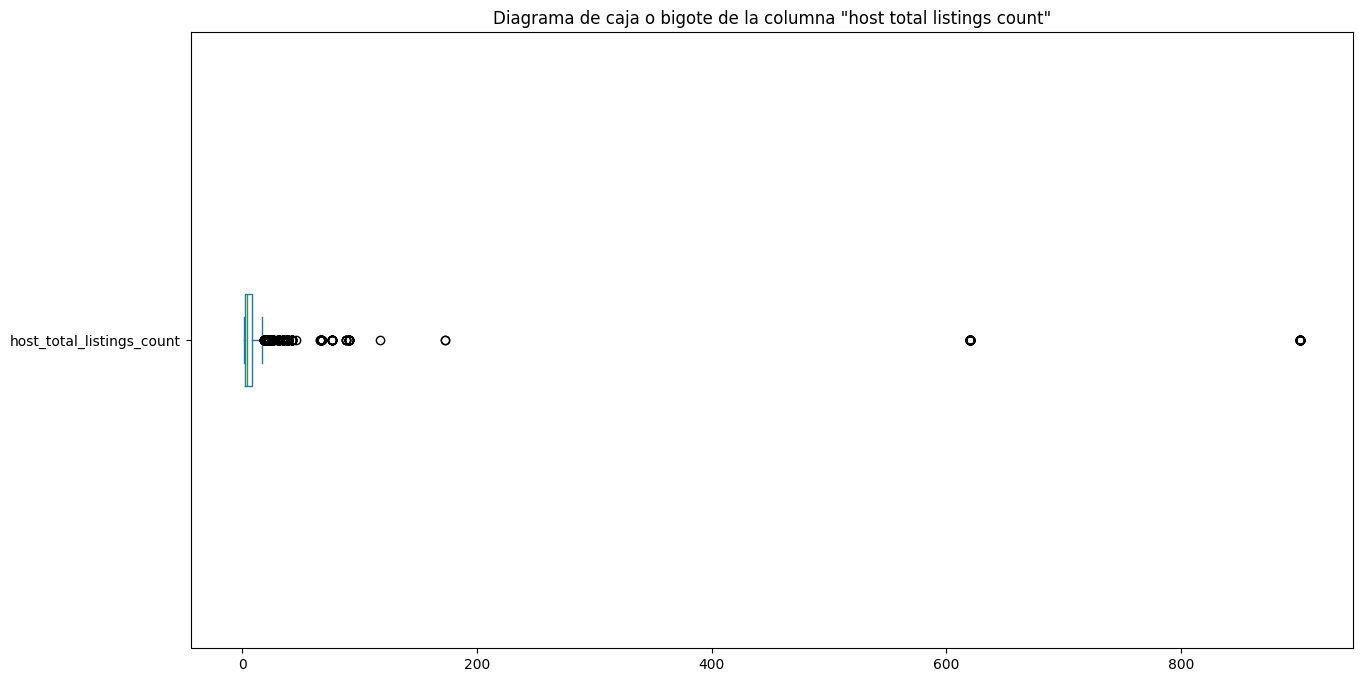

In [28]:
fig = plt.figure(figsize=(15, 8))
cuantitativas['host_total_listings_count'].plot(kind='box', vert=False)
plt.title('Diagrama de caja o bigote de la columna "host total listings count"')
plt.show()

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINACIÓN DE OUTLIERS EN DATAFRAME**

In [12]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

Límite superior permitido Unnamed: 0                                      3912.229731
host_listings_count                              212.125585
host_total_listings_count                        438.304589
latitude                                          45.590949
accommodates                                      11.209496
bedrooms                                           5.268600
beds                                               6.382544
minimum_nights                                    88.608270
maximum_nights                                  1675.735023
availability_30                                   47.124458
availability_60                                   98.702421
availability_90                                  151.557136
availability_365                                 567.603180
number_of_reviews                                286.695414
number_of_reviews_ltm                             85.525667
number_of_reviews_l30d                             8.451829
review_scores_

In [13]:
data2=cuantitativas [(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,Unnamed: 0,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,1.0,1.0,45.39084,4.0,2.0,3.0,3.0,180,2,...,4.990000,4.970000,4.990000,4.940000,4.960000,4.900000,1.0,1.0,0.0,0.660000
1,1,1.0,1.0,45.16820,4.0,2.0,2.0,2.0,14,29,...,5.000000,5.000000,5.000000,4.900000,5.000000,5.000000,1.0,1.0,0.0,0.070000
2,2,4.0,5.0,45.40550,1.0,1.0,1.0,30.0,365,0,...,5.000000,5.000000,5.000000,5.000000,4.890000,4.780000,1.0,0.0,1.0,0.120000
3,3,1.0,8.0,45.26910,8.0,5.0,4.0,1.0,90,27,...,4.690000,4.780000,4.840000,4.870000,4.730000,4.630000,1.0,1.0,0.0,0.670000
4,4,6.0,8.0,45.40455,4.0,2.0,2.0,31.0,1125,2,...,4.780000,4.890000,4.890000,4.890000,4.890000,4.780000,6.0,3.0,3.0,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2859,2.0,2.0,45.41259,2.0,1.0,1.0,1.0,365,13,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,1.0,0.0,1.0,2.019579
2860,2860,1.0,1.0,45.39920,4.0,2.0,2.0,30.0,365,30,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,1.0,1.0,0.0,2.019579
2861,2861,6.0,8.0,45.41247,2.0,1.0,1.0,30.0,365,30,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,2.0,2.0,0.0,2.019579
2862,2862,24.0,42.0,45.44961,1.0,1.0,1.0,5.0,365,30,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,24.0,6.0,NaN,2.019579


In [14]:
valores_nulos1= data2.isnull().sum()
valores_nulos1

Unnamed: 0                                       0
host_listings_count                             53
host_total_listings_count                       95
latitude                                        12
accommodates                                    38
bedrooms                                        23
beds                                            31
minimum_nights                                  49
maximum_nights                                   0
availability_30                                  0
availability_60                                  0
availability_90                                  0
availability_365                                 0
number_of_reviews                               70
number_of_reviews_ltm                           48
number_of_reviews_l30d                          47
review_scores_rating                            55
review_scores_accuracy                          54
review_scores_cleanliness                       49
review_scores_checkin          

In [15]:
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

valores_nulos = data_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

**PROCEDIMIENTO "CUARTILES" PARA CALCULAR OUTLIERS**

In [16]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q1
iqr=percentile75-percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 + 1.5*iqr

In [17]:
#Obtenemos datos limpios del Dataframe

df3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3_iqr

,Unnamed: 0,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,8.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1125.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
valores_nulos=df3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                      2863
host_listings_count                             2687
host_total_listings_count                       2674
latitude                                        2791
accommodates                                    2657
bedrooms                                        2511
beds                                            2513
minimum_nights                                  2832
maximum_nights                                  2184
availability_30                                 2864
availability_60                                 2864
availability_90                                 2864
availability_365                                2864
number_of_reviews                               2603
number_of_reviews_ltm                           2600
number_of_reviews_l30d                          2484
review_scores_rating                            2864
review_scores_accuracy                          2864
review_scores_cleanliness                     

In [19]:
valores_nulos=df3_iqr.isnull().sum().sum()
valores_nulos

np.int64(72801)

In [20]:
data_clean_iqr=data2.copy()
data_clean_iqr=data_clean.fillna(round(data2.mean(),1))
data_clean_iqr

valores_nulos=data_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

In [21]:
#Union del dataframe cuantitativo con el cualitativo 

Datos_limpios = pd.concat([cualitativas, data_clean_iqr], axis=1)
Datos_limpios

,name,description,neighborhood_overview,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,Westboro Village Executive Suite,A tastefully decorated and well equipped upper...,"Westboro Village is a century-old community, a...",Glenn,"Ottawa, Canada",within an hour,100%,94%,t,Carlingwood - McKellar Park - Laurentien View,...,4.990000,4.970000,4.990000,4.940000,4.960000,4.900000,1.0,1.0,0.0,0.660000
1,Rural charm close to the city,Close to Strathmere and other wedding venues. ...,Most folks ask about Strathmere - we are less ...,Daniel,"Ottawa, Canada",within an hour,100%,89%,f,No location,...,5.000000,5.000000,5.000000,4.900000,5.000000,5.000000,1.0,1.0,0.0,0.070000
2,Basement Studio - Old Ottawa East,pending description,"The worlds longest skating rink, a UNESCO heri...",Ela,"Ottawa, Canada",within an hour,100%,98%,f,No location,...,5.000000,5.000000,5.000000,5.000000,4.890000,4.780000,1.0,0.0,1.0,0.120000
3,"Private entrance apartment, 3-bdrm - up to 8 g...",GREAT for a family or a group. The apt. is low...,"Backstreet, small family oriented, peaceful, c...",William,"Ottawa, Canada",within a few hours,100%,80%,t,No location,...,4.690000,4.780000,4.840000,4.870000,4.730000,4.630000,1.0,1.0,0.0,0.670000
4,"Adorable 2 bdrm, Central Ottawa PD1","This an adorable property with two bedrooms, f...","This is one of the trediest, most walkable nei...",Greg And Valerie,"Ottawa, Canada",within an hour,100%,93%,f,Braemar Park - Bel Air Heights - Copeland Park,...,4.780000,4.890000,4.890000,4.890000,4.890000,4.780000,6.0,3.0,3.0,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Tina's Place walk to Parliament Hill,"Enjoy this charming 1900' house to stay, it is...",pending description,Tina,"Ottawa, Canada",within an hour,100%,95%,f,Centretown,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,1.0,0.0,1.0,2.019579
2860,Cozy Two bedrooms Condo,"Situated in the heart of West Centre Town, fea...",pending description,You Lin,No location,within an hour,100%,95%,f,Centretown West,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,1.0,1.0,0.0,2.019579
2861,Corporate Suite - Centertown,Enjoy a stylish experience at this centrally l...,pending description,Christopher,No location,within an hour,83%,100%,f,Centretown,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,2.0,2.0,0.0,2.019579
2862,Charming Room in Quiet Location,"Cozy, bright room in a secure, quiet building ...",pending description,Seynabou,No location,a few days or more,32%,3%,f,No location,...,4.790569,4.762193,4.864314,4.847956,4.783974,4.704649,24.0,6.0,1.4,2.019579


In [24]:
Datos_limpios.to_csv('Datos_Limpios_OTTAWA.csv')